# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2024/)    
## 1MS041, 2024 
&copy;2024 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# CountVectorizer and TFIDFVectorizer

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import numpy as np

X_test = np.array(['test of stuff', 'something of test', 'stuff of something'])

In [3]:
cv = CountVectorizer()

In [4]:
cv.fit(X_test)

CountVectorizer()

In [5]:
cv.get_feature_names_out()

array(['of', 'something', 'stuff', 'test'], dtype=object)

In [6]:
cv.transform(X_test).todense()

matrix([[1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0]])

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf = TfidfVectorizer()
tfidf.fit(X_test)

TfidfVectorizer()

In [9]:
tfidf.get_feature_names_out()

array(['of', 'something', 'stuff', 'test'], dtype=object)

In [10]:
tfidf_m = tfidf.transform(X_test).todense()
tfidf_m

matrix([[0.48133417, 0.        , 0.61980538, 0.61980538],
        [0.48133417, 0.61980538, 0.        , 0.61980538],
        [0.48133417, 0.61980538, 0.61980538, 0.        ]])

In [11]:
np.linalg.norm(tfidf_m[0, :])

np.float64(1.0)

In [12]:
import pandas as pd

df = pd.read_csv('data/spam.csv', encoding='Latin-1')
X = df['v2']
Y = df['v1']

In [13]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [15]:
tfidf.fit(X_train)

TfidfVectorizer()

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(tfidf.transform(X_train), Y_train)

LogisticRegression()

In [17]:
from Utils import classification_report_interval

print(classification_report_interval(Y_test, lr.predict(tfidf.transform(X_test))))

            labels           precision             recall

               ham  0.96 : [0.90,1.00] 1.00 : [0.94,1.00]
              spam  0.98 : [0.82,1.00] 0.72 : [0.59,0.85]

          accuracy                                        0.96 : [0.91,1.00]



# Feature engineering

In [18]:
import pandas as pd

df = pd.read_csv('data/auto.csv')
df = df.dropna()
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [19]:
X = df['horsepower']
Y = df['mpg']

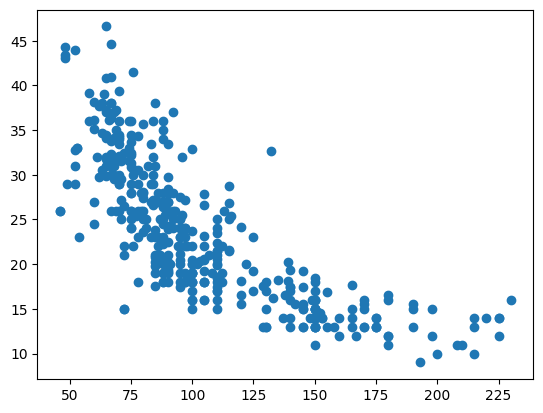

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)

Power, vs miles per gallon.

Miles per gallon is the inverse of gallon per miles which is fuel consumption.

np.float64(27.728220057440613)

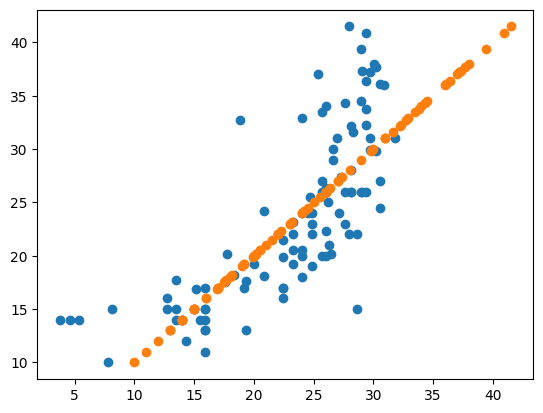

In [21]:
import numpy as np

X = df['horsepower'].to_numpy().reshape(-1, 1)
Y = df['mpg'].to_numpy()

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
lr.fit(X_train, Y_train)

import matplotlib.pyplot as plt

plt.scatter(lr.predict(X_test), Y_test)
plt.scatter(Y_test, Y_test)
np.mean((lr.predict(X_test) - Y_test) ** 2)

np.float64(24.01416793195115)

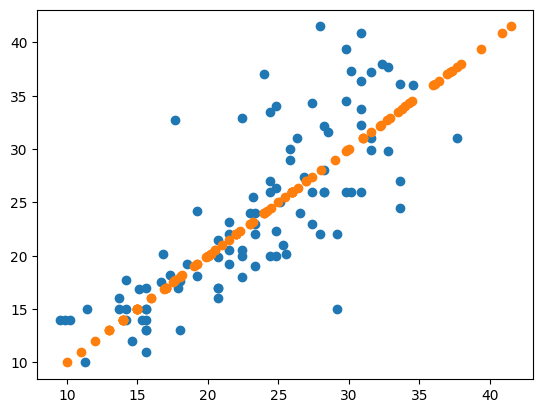

In [22]:
import numpy as np

X = df['horsepower'].to_numpy().reshape(-1, 1)
X = np.concatenate([X, 1 / X], axis=1)  # X = (n_samples,n_features)
Y = df['mpg'].to_numpy()

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
lr.fit(X_train, Y_train)

import matplotlib.pyplot as plt

plt.scatter(lr.predict(X_test), Y_test)
plt.scatter(Y_test, Y_test)
np.mean((lr.predict(X_test) - Y_test) ** 2)

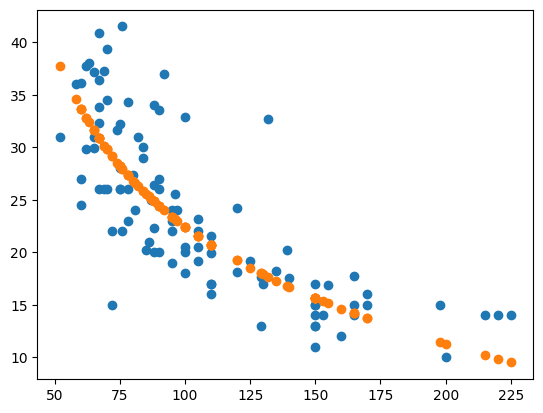

In [23]:
plt.scatter(X_test[:, 0], Y_test)
plt.scatter(X_test[:, 0], lr.predict(X_test))

# Improving optimization

1.123412e6 = 1.123412*10^6
1.234 + 1.123412e6 = 0.000000e6 + 1.123412e6 = 1.123412e6

In [24]:
1.23123e-300 = 1.23123 * 10 ^ (-300)

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (1776304069.py, line 1)

In [25]:
import scipy.io as so
import numpy as np

data = so.loadmat('data/mammography.mat')

np.random.seed(0)
shuffle_index = np.arange(0, len(data['X']))
np.random.shuffle(shuffle_index)

X = data['X'][shuffle_index, :]
Y = data['y'][shuffle_index, :].flatten()

Lets make the features very different in scale and see what happens

In [26]:
X[:, 0] = X[:, 0] + 1000

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, Y)
lr.score(X, Y)

/Users/madhurgupta/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.983814718769561

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
lr = LogisticRegression()
lr.fit(sc.fit_transform(X), Y)
lr.score(sc.transform(X), Y)

0.9837252973262989

$$
    \min L(w)
$$

$$
    \min L(w) + \lambda \|w\|^2
$$

$$
    f_w(x) = w_0 + w_1 x 
$$

## How scale and regularization affect eachother

Lets try to train two models with fairly high regularization and see what happens when we change the scale of the features

In [29]:
X = data['X'][shuffle_index, :]
Y = data['y'][shuffle_index, :].flatten()

In [30]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1 / 10000)
lr.fit(X * 100, Y)
lr.score(X * 100, Y)

0.9837252973262989

In [31]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1 / 10000)
lr.fit(X, Y)
lr.score(X, Y)

0.9767504247518555

# Transforming target

In [32]:
from sklearn.datasets import fetch_california_housing

X, Y = fetch_california_housing(return_X_y=True)

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)
lr.score(X, Y)

0.6062326851998051

(-1.0, 10.0)

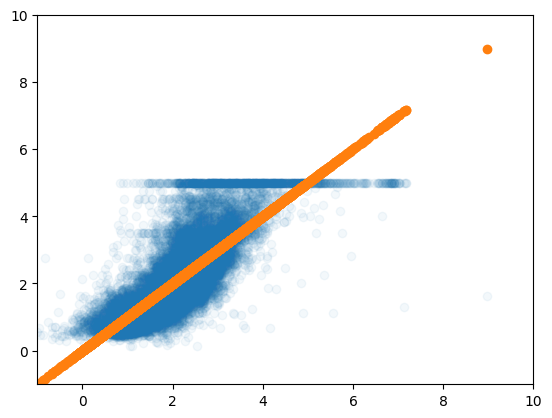

In [34]:
import matplotlib.pyplot as plt

plt.scatter(lr.predict(X), Y, alpha=0.05)
plt.scatter(lr.predict(X), lr.predict(X))
plt.xlim(-1, 10)
plt.ylim(-1, 10)

In [35]:
# log(X) - log(Y) = log(X / Y)

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (620813649.py, line 1)

0.6143678372037653

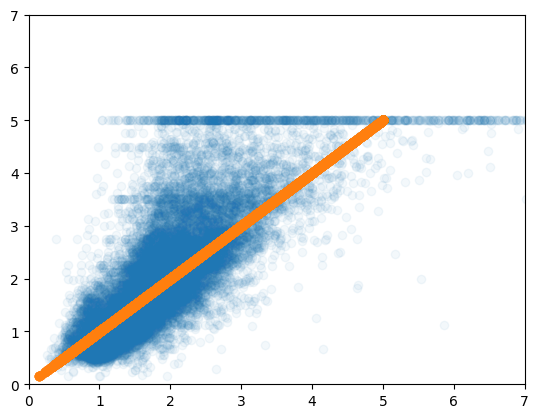

In [36]:
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X, np.log(Y))
plt.scatter(np.exp(lr.predict(X)), Y, alpha=0.05)
plt.scatter(Y, Y)
plt.xlim(0, 7)
plt.ylim(0, 7)
lr.score(X, np.log(Y))

0.6228009814592577

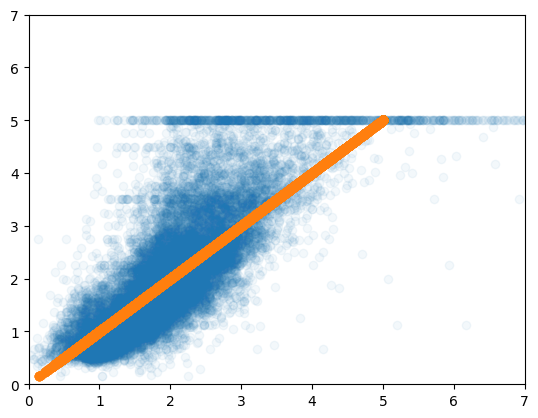

In [37]:
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X, np.sqrt(Y))
plt.scatter(np.power(lr.predict(X), 2), Y, alpha=0.05)
plt.scatter(Y, Y)
plt.xlim(0, 7)
plt.ylim(0, 7)
lr.score(X, np.sqrt(Y))
#plt.scatter(np.exp(lr.predict(X)),np.exp(lr.predict(X)))

We see that the largest prices seem to be hard to predict, lets see what happens if we remove them

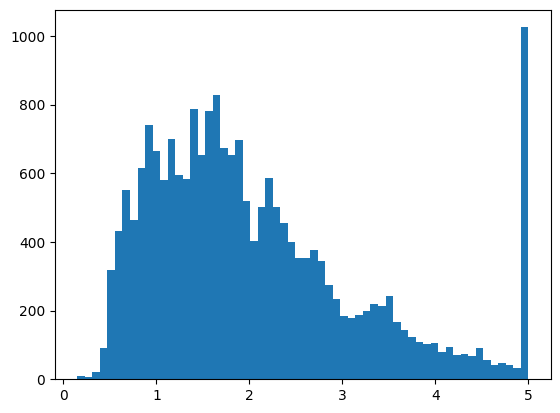

In [38]:
_ = plt.hist(Y, bins=60)

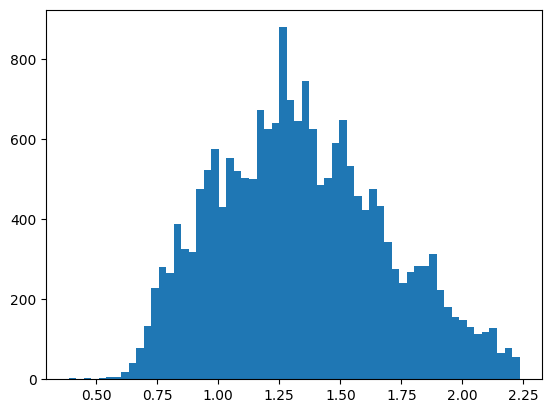

In [39]:
_ = plt.hist(np.sqrt(Y[Y < 5]), bins=60)

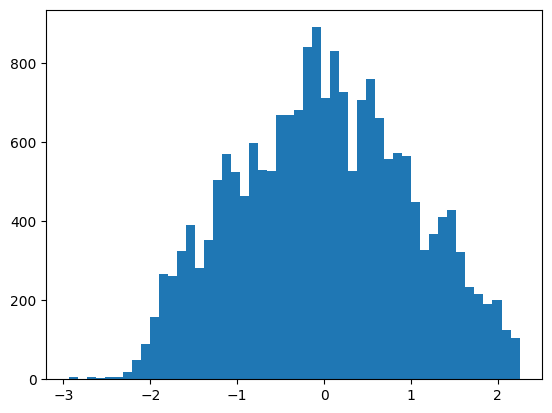

In [40]:
from sklearn.preprocessing import power_transform

_ = plt.hist(power_transform(Y[Y < 5].reshape(-1, 1)), bins=50)

## Playing around with transformations

In [41]:
X_new = X[Y < 5, :]
Y_new = Y[Y < 5]

In [42]:
from sklearn.preprocessing import PowerTransformer

pw = PowerTransformer()
pw.fit(Y_new.reshape(-1, 1))

PowerTransformer()

(-1.0, 7.0)

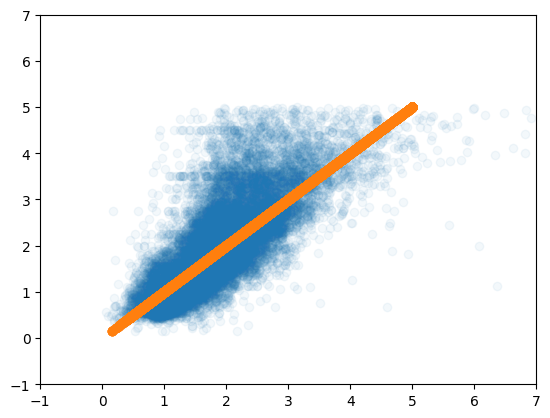

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_new, pw.transform(Y_new.reshape(-1, 1)).flatten())

import matplotlib.pyplot as plt

plt.scatter(pw.inverse_transform(lr.predict(X_new).reshape(-1, 1)), Y_new, alpha=0.05)
plt.scatter(Y, Y)
plt.xlim(-1, 7)
plt.ylim(-1, 7)

In [44]:
lr.score(X_new, pw.transform(Y_new.reshape(-1, 1)).flatten())

0.6093642608871843

(-1.0, 7.0)

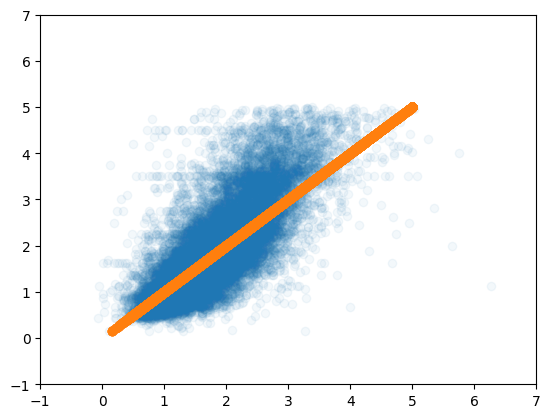

In [45]:
pw2 = PowerTransformer()
pw2.fit(X_new)
lr = LinearRegression()
lr.fit(pw2.transform(X_new), pw.transform(Y_new.reshape(-1, 1)).flatten())

import matplotlib.pyplot as plt

plt.scatter(pw.inverse_transform(lr.predict(pw2.transform(X_new)).reshape(-1, 1)), Y_new, alpha=0.05)
plt.scatter(Y, Y)
plt.xlim(-1, 7)
plt.ylim(-1, 7)

In [46]:
lr.score(pw2.transform(X_new), pw.transform(Y_new.reshape(-1, 1)).flatten())

0.576878002904674

# Concentration

In [56]:
from ipywidgets import interact, IntSlider, FloatSlider
from Utils import discrete_histogram, bennett_epsilon
import numpy as np


@interact
def concentration(n=IntSlider(1, 1, 100, 5), p=FloatSlider(value=0.5, min=0, max=1, step=0.1)):
    import matplotlib.pyplot as plt
    X = np.random.binomial(1, p, size=(n, 10000))
    means = np.mean(X, axis=0)
    print("P(mean > mu + 0.3 ) = %.5f <= Chebychev %.5f" % (np.mean(means > 0.5 + 0.3), (1 / 4) / (0.3 ** 2 * n)))
    print("P(mean > mu + 0.3 ) = %.5f <= Hoeffding %.5f" % (np.mean(means > 0.5 + 0.3), np.exp(-2 * n * 0.3 ** 2)))
    print(np.quantile(means, 0.025), np.quantile(means, 0.975))
    epsilon1 = epsilon_bounded(n, 1, 0.05)
    epsilon2 = bennett_epsilon(n, 1, np.sqrt((1 / 2) * p * (1 - p)), 0.05)
    print("95%% confidence interval Hoeffding [%.2f, %.2f] for n=%d" % (
        np.mean(means) - epsilon1, np.mean(means) + epsilon1, n))
    print("95%% confidence interval Bennett [%.2f, %.2f] for n=%d" % (
        np.mean(means) - epsilon2, np.mean(means) + epsilon2, n))
    discrete_histogram(means, normed=True)
    plt.xlim(-0.1, 1.1)

interactive(children=(IntSlider(value=1, description='n', min=1, step=5), FloatSlider(value=0.5, description='…

# Spam vs not spam, more complete

In [48]:
import pandas as pd

df = pd.read_csv('data/spam.csv', encoding='Latin-1')
X = df['v2']
Y = df['v1']

import pandas as pd

df = pd.read_csv('data/spam.csv', encoding='Latin-1')

X = df['v2']
Y = df['v1']

from Utils import train_test_validation

X_train, X_test, X_valid, Y_train, Y_test, Y_valid = train_test_validation(X, Y)

from sklearn.pipeline import Pipeline

p = Pipeline([('tfidf', TfidfVectorizer()), ('model', LogisticRegression())])

p.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LogisticRegression())])

## If we have no specific cost in mind

Then simply compute confidence intervals on the standard metrics

In [49]:
from Utils import classification_report_interval

print(classification_report_interval(Y_test, p.predict(X_test)))

            labels           precision             recall

               ham  0.96 : [0.90,1.00] 1.00 : [0.94,1.00]
              spam  0.99 : [0.81,1.00] 0.75 : [0.59,0.90]

          accuracy                                        0.97 : [0.91,1.00]



## Lets define a cost

If we say something is spam but its not spam, that is quite bad and we could miss important emails. We could say that costs $100$.

If on the other hand we have spam that is classified as not spam, then that is annoying and we have to manually delete it. Lets say that incurrs a cost of $10$.

That is, if we define the random variable 
$$E_1 = 1_{Y=0, g(X)=1} = 1_{Y=0} 1_{g(X) = 1}$$
and the random variable
$$E_2 = 1_{Y=1, g(X)=0} = 1_{Y=1} 1_{g(X) = 0} = (1-1_{Y=0})(1-1_{g(X)=1}) = 1 - 1_{Y=0} - 1_{g(X)=1} + E_1$$

Then the cost of a randomly chosen sms is the random variable
$$
    C = 100 E_1 + 10 E_2
$$

In [50]:
Y_01 = (Y_test == 'spam') * 1  # This makes Y_01 into 0 for ham and 1 for spam
g_01 = (p.predict(X_test) == 'spam') * 1  # This makes g_01 into 0 for ham and 1 for spam

In [51]:
Y_0 = 1 - Y_01
g_1 = g_01
E_1 = Y_0 * g_1
E_2 = 1 - Y_0 - g_1 + E_1
C = 100 * E_1 + 10 * E_2

We are interested in the expected (average) cost of an sms, we need to estimate $E[C]$.

We assume that all the sms are i.i.d. so we can use Hoeffdings inequality:

1. What do we know about $C$? Well the only thing we know is that it is bounded by $0 \leq C \leq 100$.
2. Use Hoeffdings inequality to get a confidence interval
3. We will use the `epsilon_bounded` function from `Utils` to do this

In [52]:
from Utils import epsilon_bounded, print_confidence_interval

eps = epsilon_bounded(len(C), 100, 0.05)
mean = np.mean(C)
print_confidence_interval(mean, eps, min_value=0, max_value=100)

[0.00,4.49]


However, we know that we can adjust the threshold of our model, and perhaps the cost will be different for another threshold?

In [53]:
def cost(threshold):
    Y_01 = (Y_test == 'spam') * 1  # This makes Y_01 into 0 for ham and 1 for spam
    g_01 = (p.predict_proba(X_test)[:, 1] >= threshold) * 1  # This makes g_01 into 0 for ham and 1 for spam
    Y_0 = 1 - Y_01
    g_1 = g_01
    E_1 = Y_0 * g_1
    E_2 = 1 - Y_0 - g_1 + E_1
    C = 100 * E_1 + 10 * E_2

    return np.mean(C)

In [54]:
thresholds = np.linspace(0, 1, 100)
costs = [cost(t) for t in thresholds]

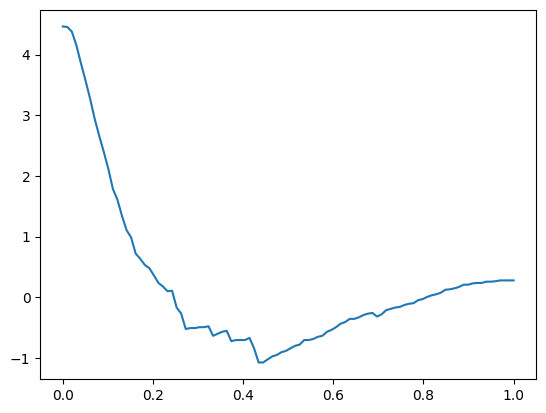

In [55]:
import matplotlib.pyplot as plt

plt.plot(thresholds, np.log(costs))

### Now we can compute the confidence interval in the same way, but on the validation data